In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [10]:
import seaborn as sns

In [2]:
from sklearn.model_selection import cross_val_score

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train = pd.read_csv('train.csv')

In [5]:
f_train = pd.read_csv('formula_train.csv')

In [48]:
train.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,critical_temperature
0,4,95.950150,87.221940,89.534122,81.423258,1.317590,1.301059,96.1190,20.285800,36.105357,...,4.10,4.053600,3.944244,1.339718,1.245504,3,1.400000,1.299038,1.135782,21.50
1,5,83.244760,59.224400,59.506081,36.126175,1.311510,1.372050,192.9810,25.192187,67.233835,...,2.40,2.402249,2.259897,1.519383,1.365077,3,0.933333,1.200000,1.019804,62.00
2,2,23.035850,26.647510,21.192566,25.010514,0.614232,0.435817,18.0583,18.243490,9.029150,...,5.10,4.242641,4.873514,0.636514,0.465999,3,3.300000,1.500000,1.374773,0.29
3,4,81.756699,79.833804,76.282833,75.275775,1.312596,1.149324,81.4820,28.789976,32.890369,...,3.62,3.309751,3.413039,1.333736,1.019322,3,1.920000,1.118034,1.198165,19.50
4,2,67.485250,69.699016,57.442709,59.574464,0.548263,0.521345,70.8405,39.638078,35.420250,...,6.00,6.000000,6.000000,0.693147,0.691193,0,0.375000,0.000000,0.000000,5.36


In [7]:
formula = f_train.material

In [6]:
f_train = f_train.drop(columns='material')

In [7]:
y = train.critical_temperature

In [8]:
train = train.drop(columns='critical_temperature')

In [11]:
sns.set(rc={'figure.figsize': (12,9)})

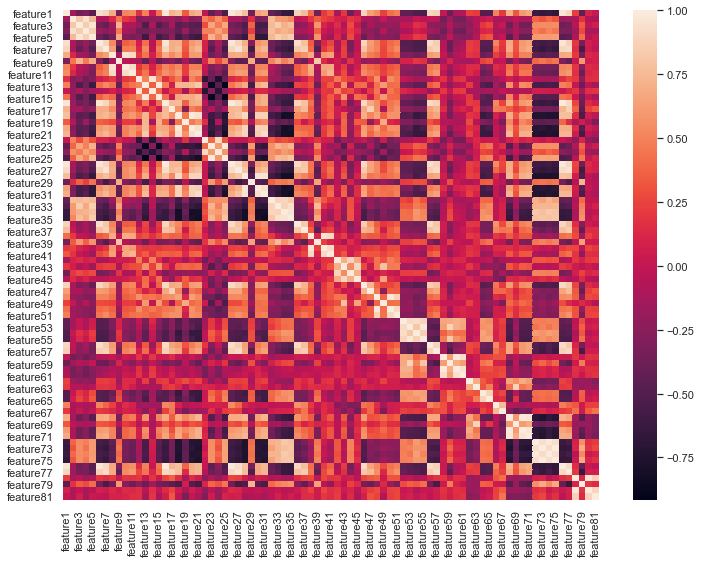

In [12]:
sns.heatmap(train.corr())

In [4]:
correl = train.corr()

In [5]:
correl.critical_temperature.sum()

7.528777151868301

In [58]:
corr_list = []

In [13]:
train = train.drop(columns={'feature1', 'feature6', 'feature16', 
                            'feature26', 'feature56', 'feature76',
                           'feature2', 'feature3','feature27',
                           'feature77', 'feature10', 'feature11',
                           'feature14', 'feature15', 'feature18',
                           'feature20', 'feature21', 'feature22',
                           'feature23', 'feature30', 'feature31',
                           'feature33', 'feature35', 'feature40',
                           'feature41', 'feature50', 'feature52',
                           'feature53', 'feature58', 'feature61',
                           'feature68', 'feature70', 'feature72',
                           'feature74', 'feature75','feature78'})

In [14]:
train.head()

,feature4,feature5,feature7,feature8,feature9,feature12,feature13,feature17,feature19,feature24,...,feature64,feature65,feature66,feature67,feature69,feature71,feature73,feature79,feature80,feature81
0,89.534122,81.423258,1.301059,96.1190,20.285800,740.625,786.620000,1.202333,307.450000,164.442987,...,50.754738,48.531069,1.191039,1.203416,20.900000,30.483602,4.10,1.400000,1.299038,1.135782
1,59.506081,36.126175,1.372050,192.9810,25.192187,779.880,1005.866667,1.019202,661.026667,133.425311,...,14.287643,0.969156,0.871976,0.777323,53.319157,137.579265,2.40,0.933333,1.200000,1.019804
2,21.192566,25.010514,0.435817,18.0583,18.243490,1200.250,1119.750000,0.661811,278.850000,69.799713,...,0.072768,0.110120,0.350471,0.202131,0.135751,0.082106,5.10,3.300000,1.500000,1.374773
3,76.282833,75.275775,1.149324,81.4820,28.789976,741.475,782.600000,1.059188,363.318000,161.714287,...,51.637761,49.174596,1.244889,0.997395,28.020000,23.297974,3.62,1.920000,1.118034,1.198165
4,57.442709,59.574464,0.521345,70.8405,39.638078,859.250,850.515625,0.688021,86.046875,122.682517,...,5.545268,6.814486,0.010367,0.009300,79.591406,74.751073,6.00,0.375000,0.000000,0.000000


In [15]:
X = train.merge(f_train, left_index=True, right_index=True)

In [46]:
X.head()

,feature4,feature5,feature7,feature8,feature9,feature12,feature13,feature17,feature19,feature24,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,89.534122,81.423258,1.301059,96.1190,20.285800,740.625,786.620000,1.202333,307.450000,164.442987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,59.506081,36.126175,1.372050,192.9810,25.192187,779.880,1005.866667,1.019202,661.026667,133.425311,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0
2,21.192566,25.010514,0.435817,18.0583,18.243490,1200.250,1119.750000,0.661811,278.850000,69.799713,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,76.282833,75.275775,1.149324,81.4820,28.789976,741.475,782.600000,1.059188,363.318000,161.714287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,57.442709,59.574464,0.521345,70.8405,39.638078,859.250,850.515625,0.688021,86.046875,122.682517,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [16]:
models = [LinearRegression(), # метод наименьших квадратов
	          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
	          KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
	          SVR(kernel='linear'), # метод опорных векторов с линейным ядром
	          LogisticRegression() # логистическая регрессия
	          ]

In [64]:
logis = LogisticRegression()

In [22]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, y, test_size=0.25, random_state = 0)

In [20]:
cvl = cross_val_score(models[1], Xtrn, Ytrn, cv= 5, scoring = 'r2')

In [21]:
cvl

array([0.91503343, 0.9172103 , 0.9010534 , 0.91865486, 0.90975349])

In [24]:
#градиентный бустинг
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [18]:
models[1].fit(Xtrn, Ytrn)
r2_score(Ytest, models[1].predict(Xtest))

0.9148236630896842

In [16]:
test = pd.read_csv('test.csv')

In [17]:
f_test = pd.read_csv('formula_test.csv')

In [18]:
f_test = f_test.drop(columns='material')

In [19]:
test = test.drop(columns={'feature1', 'feature6', 'feature16', 
                            'feature26', 'feature56', 'feature76',
                           'feature2', 'feature3','feature27',
                           'feature77', 'feature10', 'feature11',
                           'feature14', 'feature15', 'feature18',
                           'feature20', 'feature21', 'feature22',
                           'feature23', 'feature30', 'feature31',
                           'feature33', 'feature35', 'feature40',
                           'feature41', 'feature50', 'feature52',
                           'feature53', 'feature58', 'feature61',
                           'feature68', 'feature70', 'feature72',
                           'feature74', 'feature75','feature78'})

In [20]:
X_test = test.merge(f_test, left_index=True, right_index=True)

In [21]:
answer = models[1].predict(X_test)

In [22]:
answer

array([57.4663    ,  3.23775   , 17.0822    , ..., 32.53168415,
       27.874     ,  6.06238333])

In [26]:
data = pd.DataFrame(answer)

In [23]:
ans = pd.read_csv('answer.csv')

In [30]:
data

,0
0,57.466300
1,3.237750
2,17.082200
3,85.446167
4,20.227831
...,...
4258,2.103660
4259,87.469844
4260,32.531684
4261,27.874000


In [24]:
r2_score(ans, models[1].predict(X_test))

0.9861027521052316

In [28]:
data.to_csv('answer.csv', index=False, header=None)

In [32]:
ans1 = pd.read_csv('answer1.csv')

In [36]:
aaa = ans1['0'].values

In [37]:
data = pd.DataFrame(aaa)

In [38]:
data.to_csv('answer.csv', index=False, header=None)

In [ ]:
pd.read_csv('')